# EDA

In [1]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision', 3)

In [3]:
# Cargamos la información de la primer planta
df_plant1_gen = pd.read_csv('DATASETS/Plant_1_Generation_Data.csv', parse_dates=["DATE_TIME"])
df_plant1_weather = pd.read_csv('DATASETS/Plant_1_Weather_Sensor_Data.csv', parse_dates=["DATE_TIME"])

In [4]:
# Mostramos las primeras 10 filas de df_plant1_gen
df_plant1_gen.head(10)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   
5 2020-05-15   4135001  VHMLBKoKgIrUVDU       0.0       0.0          0.0   
6 2020-05-15   4135001  WRmjgnKYAwPKWDb       0.0       0.0          0.0   
7 2020-05-15   4135001  ZnxXDlPa8U1GXgE       0.0       0.0          0.0   
8 2020-05-15   4135001  ZoEaEvLYb1n2sOq       0.0       0.0          0.0   
9 2020-05-15   4135001  adLQvlD726eNBSB       0.0       0.0          0.0   

   TOTAL_YIELD  
0    6.260e+06  
1    6.184e+06  
2    6.988e+06  
3    7.603e+06  
4    7.159e+06  
5    7.206e+06  
6    7.029e+06  
7    6.522e+06  
8    7.098e+06  
9    6.271e+06

In [5]:
# Mostramos las primeras 10 filas de df_plant1_weather
df_plant1_weather.head(10)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe               25.184   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe               25.085   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe               24.936   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe               24.846   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe               24.622   
5 2020-05-15 01:15:00   4135001  HmiyD2TTLFNqkNe               24.536   
6 2020-05-15 01:30:00   4135001  HmiyD2TTLFNqkNe               24.639   
7 2020-05-15 01:45:00   4135001  HmiyD2TTLFNqkNe               24.873   
8 2020-05-15 02:00:00   4135001  HmiyD2TTLFNqkNe               24.937   
9 2020-05-15 02:15:00   4135001  HmiyD2TTLFNqkNe               25.012   

   MODULE_TEMPERATURE  IRRADIATION  
0              22.858          0.0  
1              22.762          0.0  
2              22.592          0.0  
3              22.361          0.0  
4              22.165          0.0  
5              21.969          0.0  
6              22.353          0.0  
7              23.161          0.0  
8              23.026          0.0  
9              23.343          0.0

In [6]:
print(df_plant1_gen['SOURCE_KEY'].unique().size)
print(df_plant1_weather['SOURCE_KEY'].unique().size)

print(df_plant1_gen['PLANT_ID'].unique().size)
print(df_plant1_weather['PLANT_ID'].unique().size)


22
1
1
1


In [8]:
# Obteniendo más información del dataframe: df_plant1_gen
df_plant1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [9]:
# Información estadistica de df_plant1_gen
df_plant1_gen.describe()

DATE_TIME   PLANT_ID   DC_POWER   AC_POWER  \
count                          68778  6.878e+04  68778.000  68778.000   
mean   2020-06-01 08:02:49.458256896  4.135e+06   3147.426    307.803   
min              2020-05-15 00:00:00  4.135e+06      0.000      0.000   
25%              2020-05-24 00:45:00  4.135e+06      0.000      0.000   
50%              2020-06-01 14:30:00  4.135e+06    429.000     41.494   
75%              2020-06-09 20:00:00  4.135e+06   6366.964    623.619   
max              2020-06-17 23:45:00  4.135e+06  14471.125   1410.950   
std                              NaN  0.000e+00   4036.457    394.396   

       DAILY_YIELD  TOTAL_YIELD  
count    68778.000    6.878e+04  
mean      3295.969    6.979e+06  
min          0.000    6.184e+06  
25%          0.000    6.512e+06  
50%       2658.714    7.147e+06  
75%       6274.000    7.269e+06  
max       9163.000    7.847e+06  
std       3145.178    4.163e+05

In [10]:
# Obteniendo más información del dataframe: df_plant1_weather
df_plant1_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [11]:
# Información estadistica de df_plant1_weather
df_plant1_weather.describe()

DATE_TIME   PLANT_ID  AMBIENT_TEMPERATURE  \
count                           3182  3.182e+03             3182.000   
mean   2020-06-01 05:52:22.080452608  4.135e+06               25.532   
min              2020-05-15 00:00:00  4.135e+06               20.399   
25%              2020-05-23 22:48:45  4.135e+06               22.705   
50%              2020-06-01 09:52:30  4.135e+06               24.614   
75%              2020-06-09 16:56:15  4.135e+06               27.921   
max              2020-06-17 23:45:00  4.135e+06               35.252   
std                              NaN  0.000e+00                3.355   

       MODULE_TEMPERATURE  IRRADIATION  
count            3182.000     3182.000  
mean               31.091        0.228  
min                18.140        0.000  
25%                21.091        0.000  
50%                24.618        0.025  
75%                41.308        0.450  
max                65.546        1.222  
std                12.261        0.301

In [12]:
# Parseamos la fecha a tipo date en ambos dataframes
df_plant1_gen['DATE_TIME']= pd.to_datetime(df_plant1_gen['DATE_TIME'])
df_plant1_weather['DATE_TIME']= pd.to_datetime(df_plant1_weather['DATE_TIME'])

In [14]:
# Total de dias que abarca el DF
df_plant1_gen['DATE_TIME'].dt.date.nunique()

34

In [16]:
# Listamos las fechas que abarca el DF
df_plant1_gen.DATE_TIME.dt.strftime('%Y-%m-%d').unique()

array(['2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
       '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
       '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
       '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
       '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
       '2020-06-16', '2020-06-17'], dtype=object)

In [17]:
# Obteniendo más información del dataframe: df_plant1_gen
df_plant1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [18]:
# Obteniendo más información del dataframe: df_plant1_weather
df_plant1_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


# Serie de tiempo de la producción por día

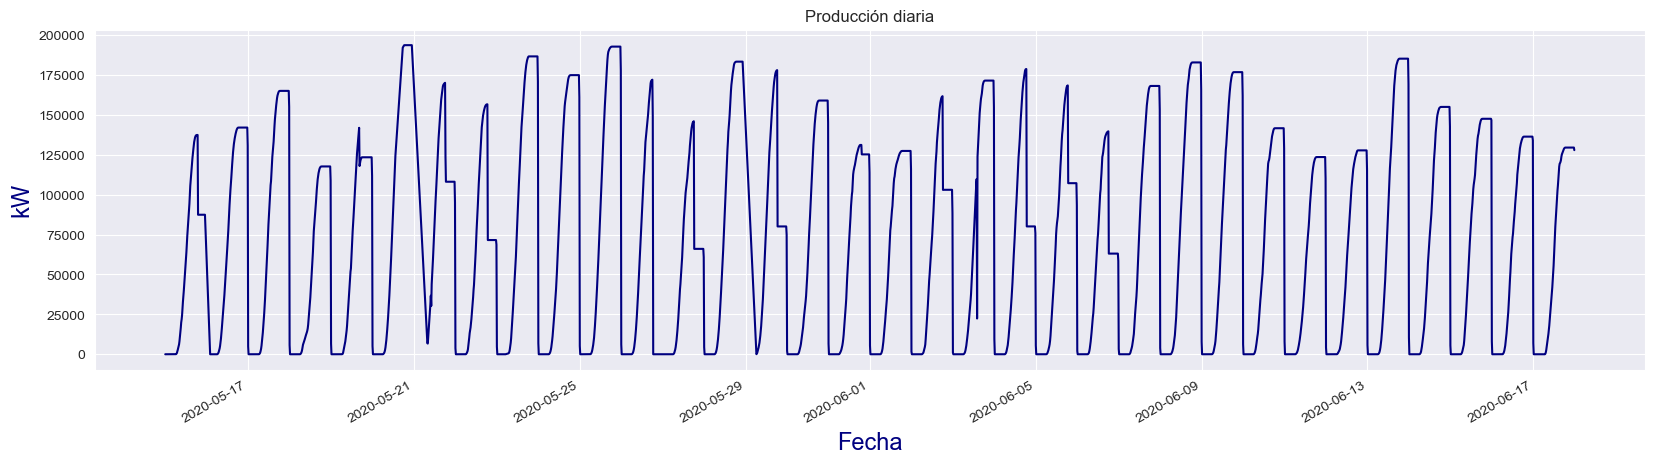

In [19]:
df_plant1_gen_group = df_plant1_gen.groupby('DATE_TIME').sum().reset_index()
df_plant1_gen_group['time']= df_plant1_gen['DATE_TIME'].dt.time

fig, ax = plt.subplots(dpi=100, figsize=(20,5))
# Graficamos
df_plant1_gen_group.plot(x='DATE_TIME', y='DAILY_YIELD', color='navy', ax=ax)

ax.set_title('Producción diaria',)
ax.set_ylabel('kW',color='navy',fontsize=17)
ax.set_xlabel('Fecha',color='navy',fontsize=17)
ax.get_legend().remove()
plt.show()


# Combinando la informacion

In [20]:
# Merge A
df_plant1 = df_plant1_gen.merge(df_plant1_weather, on=["DATE_TIME", "PLANT_ID"], suffixes=("_GENERATION", "_WEATHER"))
df_plant1.head()

DATE_TIME  PLANT_ID SOURCE_KEY_GENERATION  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001       1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001       1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001       3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001       7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001       McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD SOURCE_KEY_WEATHER  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    6.260e+06    HmiyD2TTLFNqkNe               25.184              22.858   
1    6.184e+06    HmiyD2TTLFNqkNe               25.184              22.858   
2    6.988e+06    HmiyD2TTLFNqkNe               25.184              22.858   
3    7.603e+06    HmiyD2TTLFNqkNe               25.184              22.858   
4    7.159e+06    HmiyD2TTLFNqkNe               25.184              22.858   

   IRRADIATION  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [21]:
# Merge Alternativo
# df_plant1 = pd.merge(df_plant1_gen.drop(columns=['PLANT_ID'], axis=1), df_plant1_weather.drop(columns=['PLANT_ID', 'SOURCE_KEY'], axis=1), on='DATE_TIME')

In [23]:
# Revisamos si tenemos nulos
df_plant1.isnull().sum()

DATE_TIME                0
PLANT_ID                 0
SOURCE_KEY_GENERATION    0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
SOURCE_KEY_WEATHER       0
AMBIENT_TEMPERATURE      0
MODULE_TEMPERATURE       0
IRRADIATION              0
dtype: int64

In [24]:
# Stats
df_plant1.describe()

DATE_TIME   PLANT_ID   DC_POWER   AC_POWER  \
count                          68774  6.877e+04  68774.000  68774.000   
mean   2020-06-01 08:02:38.161514240  4.135e+06   3147.177    307.778   
min              2020-05-15 00:00:00  4.135e+06      0.000      0.000   
25%              2020-05-24 00:33:45  4.135e+06      0.000      0.000   
50%              2020-06-01 14:15:00  4.135e+06    428.571     41.450   
75%              2020-06-09 20:00:00  4.135e+06   6365.469    623.561   
max              2020-06-17 23:45:00  4.135e+06  14471.125   1410.950   
std                              NaN  0.000e+00   4036.442    394.395   

       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
count    68774.000    6.877e+04            68774.000           68774.000   
mean      3295.835    6.979e+06               25.559              31.245   
min          0.000    6.184e+06               20.399              18.140   
25%          0.000    6.512e+06               22.724              21.124   
50%       2658.473    7.147e+06               24.670              24.819   
75%       6274.000    7.269e+06               27.960              41.694   
max       9163.000    7.847e+06               35.252              65.546   
std       3145.221    4.163e+05                3.361              12.308   

       IRRADIATION  
count    68774.000  
mean         0.232  
min          0.000  
25%          0.000  
50%          0.032  
75%          0.455  
max          1.222  
std          0.302

In [25]:
df_plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE_TIME              68774 non-null  datetime64[ns]
 1   PLANT_ID               68774 non-null  int64         
 2   SOURCE_KEY_GENERATION  68774 non-null  object        
 3   DC_POWER               68774 non-null  float64       
 4   AC_POWER               68774 non-null  float64       
 5   DAILY_YIELD            68774 non-null  float64       
 6   TOTAL_YIELD            68774 non-null  float64       
 7   SOURCE_KEY_WEATHER     68774 non-null  object        
 8   AMBIENT_TEMPERATURE    68774 non-null  float64       
 9   MODULE_TEMPERATURE     68774 non-null  float64       
 10  IRRADIATION            68774 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 5.8+ MB


In [26]:
df_plant1.count()

DATE_TIME                68774
PLANT_ID                 68774
SOURCE_KEY_GENERATION    68774
DC_POWER                 68774
AC_POWER                 68774
DAILY_YIELD              68774
TOTAL_YIELD              68774
SOURCE_KEY_WEATHER       68774
AMBIENT_TEMPERATURE      68774
MODULE_TEMPERATURE       68774
IRRADIATION              68774
dtype: int64

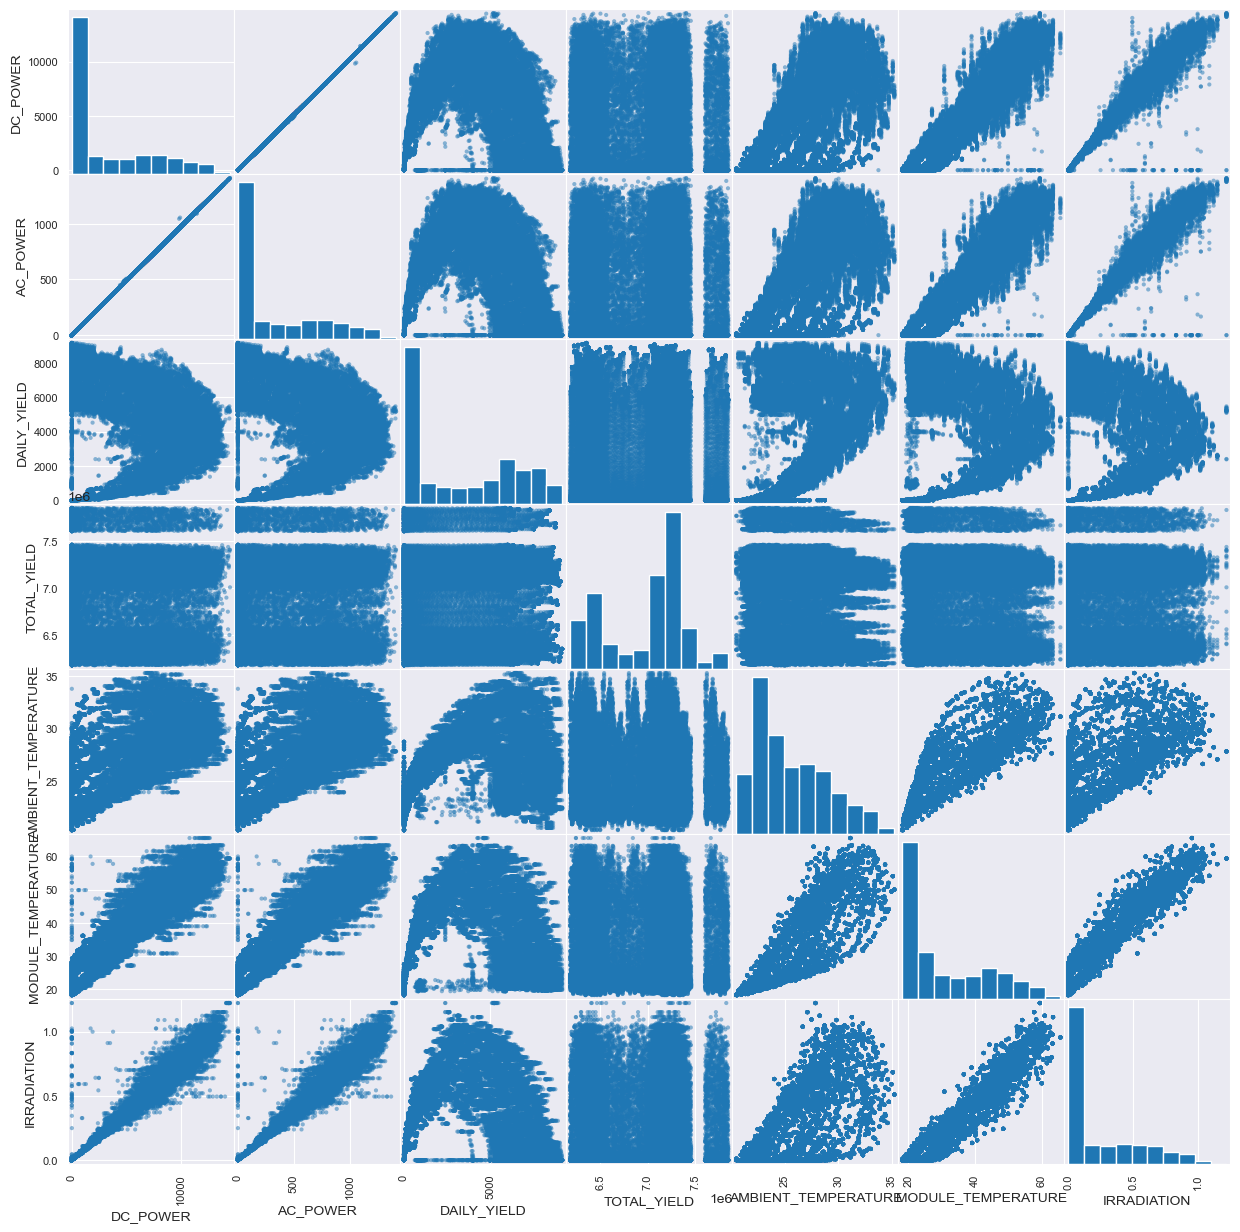

In [27]:
# Grid de correlación con Matplot
pd.plotting.scatter_matrix(df_plant1.drop(['PLANT_ID'], axis=1), figsize=(15,15))

plt.show()

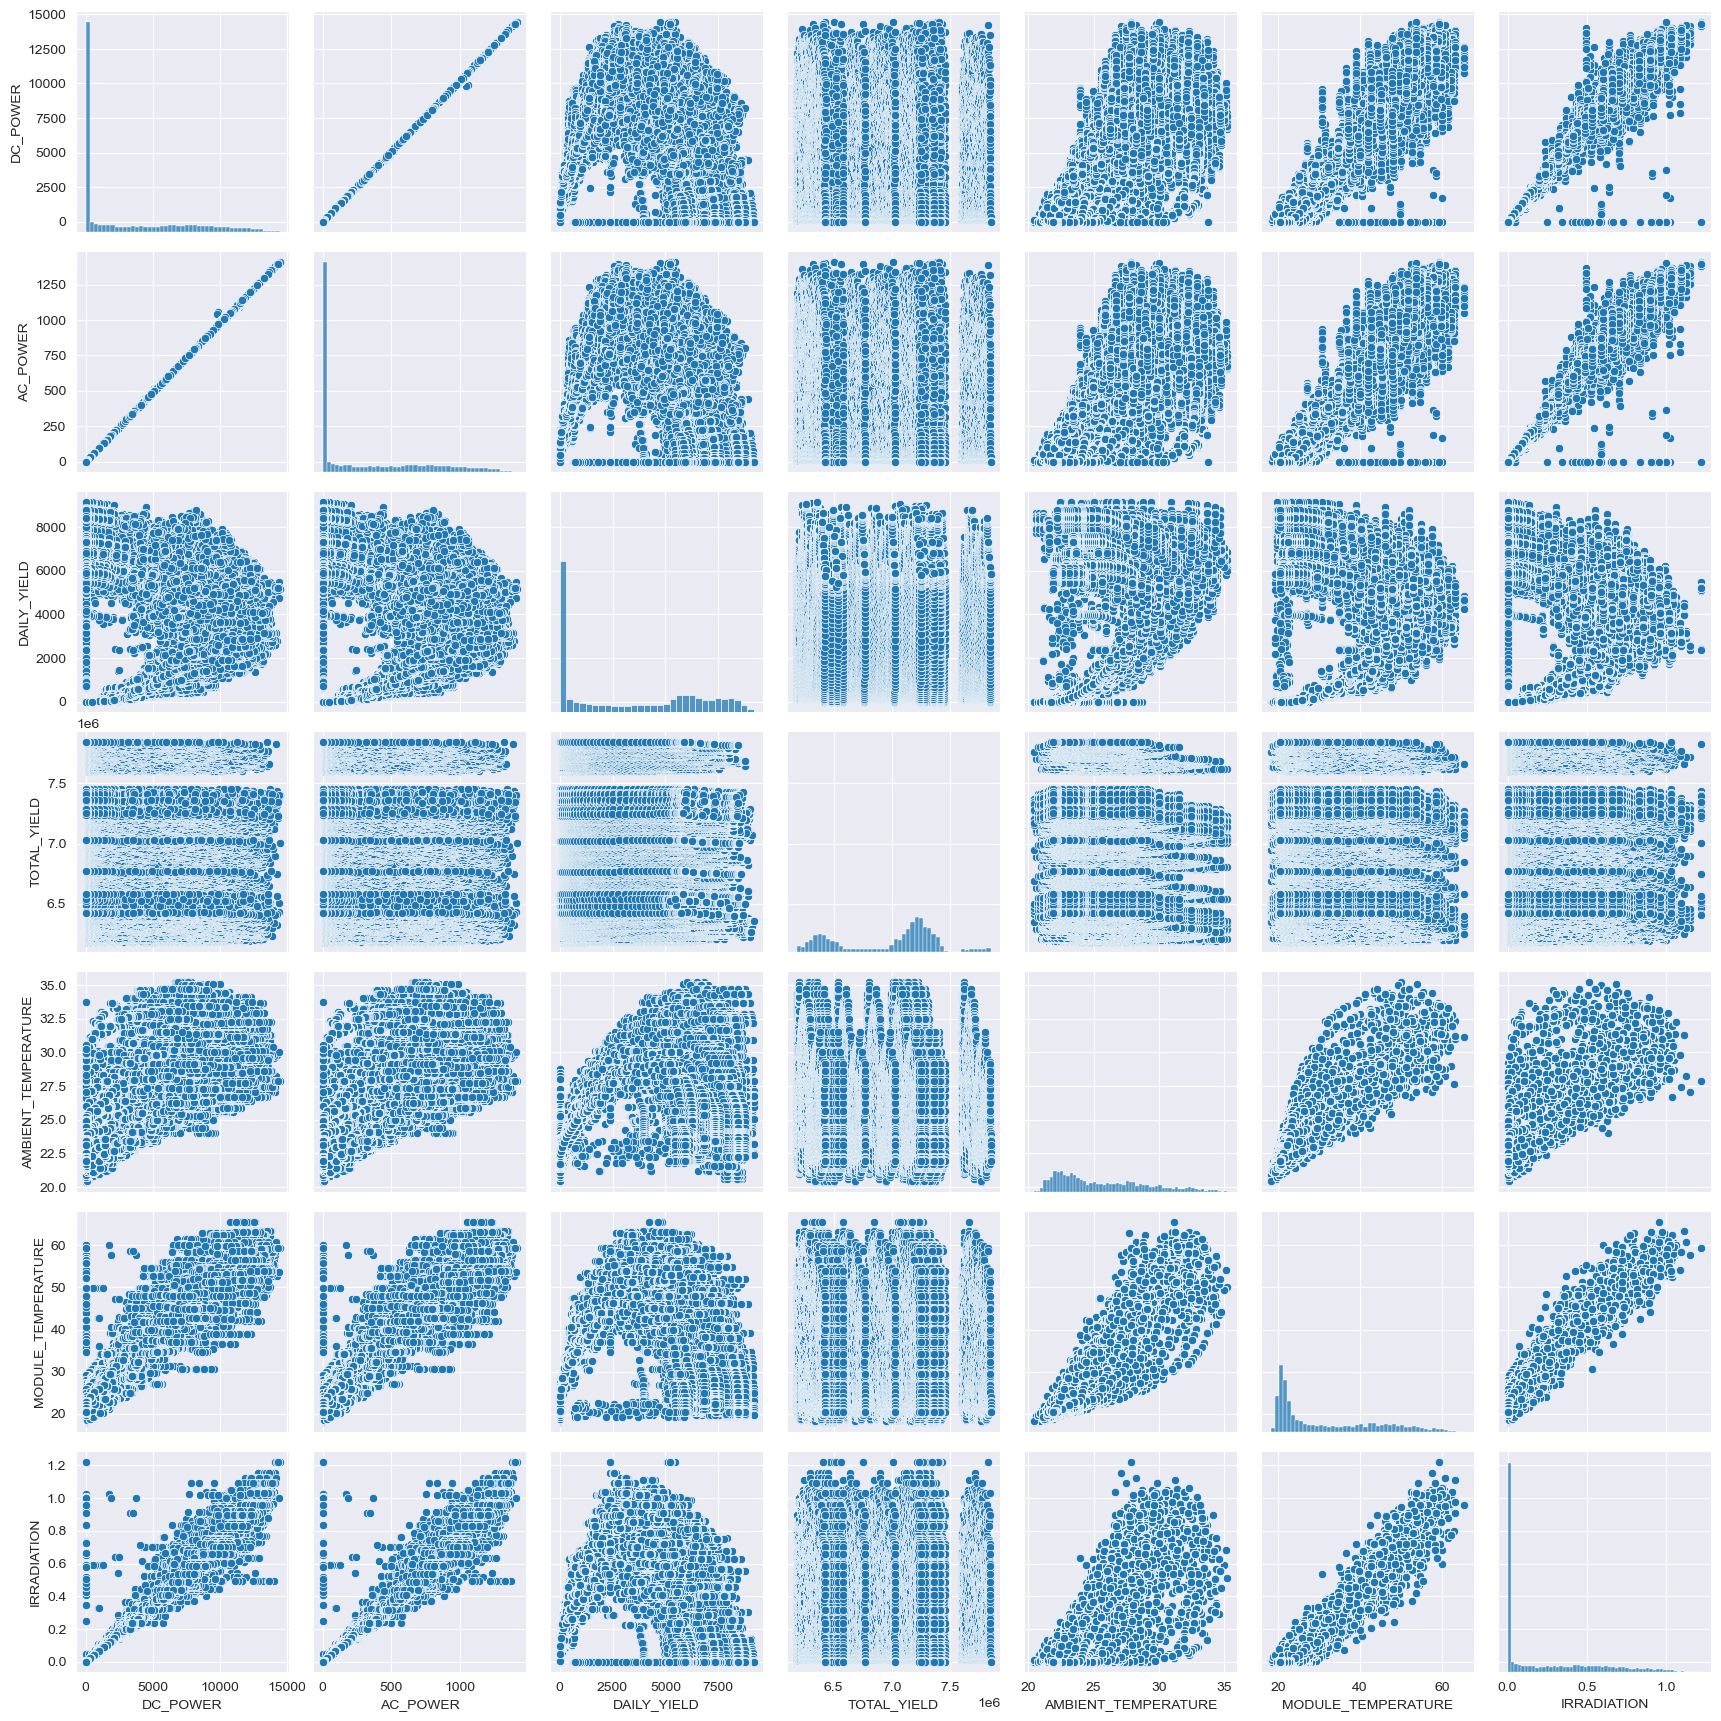

In [28]:
# Grid de correlación con Seaborn
sns.pairplot(df_plant1.drop(['PLANT_ID'], axis=1))
plt.show()

In [29]:
# Matriz de correlación
correlación= df_plant1.drop(['SOURCE_KEY_GENERATION', 'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_WEATHER'], axis=1).corr(method='pearson')

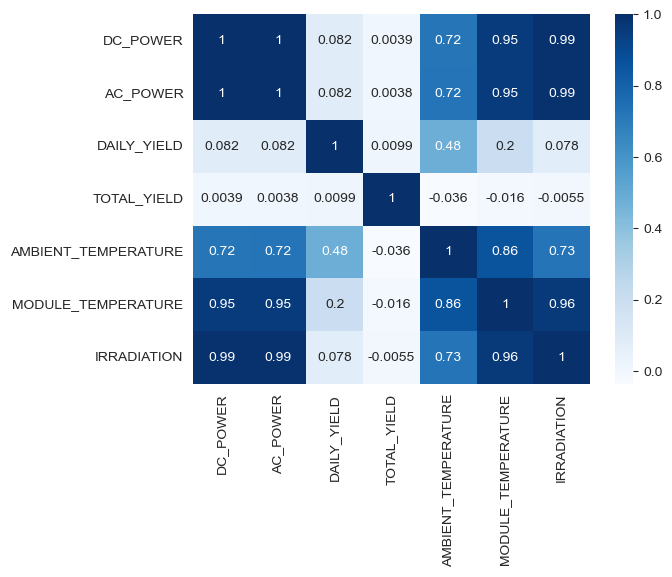

In [30]:
# Graficamos la correlación de las variables en un M. de calor
sns.heatmap(correlación, annot=True, cmap='Blues')
plt.show()

In [31]:
# Matriz de covarianza
covarianza = df_plant1.drop(['SOURCE_KEY_GENERATION', 'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_WEATHER'], axis=1).cov(ddof=0)

In [32]:
# Mostramos la matriz de covarianza
covarianza

DC_POWER   AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.629e+07  1.592e+06    1.044e+06    6.471e+06   
AC_POWER             1.592e+06  1.555e+05    1.020e+05    6.304e+05   
DAILY_YIELD          1.044e+06  1.020e+05    9.892e+06    1.296e+07   
TOTAL_YIELD          6.471e+06  6.304e+05    1.296e+07    1.733e+11   
AMBIENT_TEMPERATURE  9.832e+03  9.610e+02    5.059e+03   -5.058e+04   
MODULE_TEMPERATURE   4.744e+04  4.635e+03    7.677e+03   -7.991e+04   
IRRADIATION          1.206e+03  1.178e+02    7.438e+01   -6.901e+02   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DC_POWER                        9831.931           47435.917     1205.846  
AC_POWER                         960.974            4635.444      117.815  
DAILY_YIELD                     5058.600            7676.827       74.376  
TOTAL_YIELD                   -50580.833          -79908.168     -690.083  
AMBIENT_TEMPERATURE               11.298              35.390        0.736  
MODULE_TEMPERATURE                35.390             151.492        3.573  
IRRADIATION                        0.736               3.573        0.091

In [33]:
# Agregamos de manera separada los campos de fecha y hora al dataframe
df_plant1["DATE"] = pd.to_datetime(df_plant1["DATE_TIME"]).dt.date
df_plant1["TIME"] = pd.to_datetime(df_plant1["DATE_TIME"]).dt.time
df_plant1['DAY'] = pd.to_datetime(df_plant1['DATE_TIME']).dt.day
df_plant1['MONTH'] = pd.to_datetime(df_plant1['DATE_TIME']).dt.month
df_plant1['WEEK'] = pd.to_datetime(df_plant1['DATE_TIME']).dt.isocalendar().week

df_plant1['HOURS'] = pd.to_datetime(df_plant1['TIME'],format='%H:%M:%S').dt.hour
df_plant1['MINUTES'] = pd.to_datetime(df_plant1['TIME'],format='%H:%M:%S').dt.minute
df_plant1['TOTAL MINUTES PASS'] = df_plant1['MINUTES'] + df_plant1['HOURS']*60

# Agregamos la fecha como columnas de tipo string
df_plant1["DATE_STRING"] = df_plant1["DATE"].astype(str) # fecha como string
df_plant1["HOURS"] = df_plant1["HOURS"].astype(str)
df_plant1["TIME"] = df_plant1["TIME"].astype(str)

In [34]:
df_plant1.head(2)

DATE_TIME  PLANT_ID SOURCE_KEY_GENERATION  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001       1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001       1IF53ai7Xc0U56Y       0.0       0.0          0.0   

   TOTAL_YIELD SOURCE_KEY_WEATHER  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    6.260e+06    HmiyD2TTLFNqkNe               25.184              22.858   
1    6.184e+06    HmiyD2TTLFNqkNe               25.184              22.858   

   IRRADIATION        DATE      TIME  DAY  MONTH  WEEK HOURS  MINUTES  \
0          0.0  2020-05-15  00:00:00   15      5    20     0        0   
1          0.0  2020-05-15  00:00:00   15      5    20     0        0   

   TOTAL MINUTES PASS DATE_STRING  
0                   0  2020-05-15  
1                   0  2020-05-15

In [35]:
df_plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE_TIME              68774 non-null  datetime64[ns]
 1   PLANT_ID               68774 non-null  int64         
 2   SOURCE_KEY_GENERATION  68774 non-null  object        
 3   DC_POWER               68774 non-null  float64       
 4   AC_POWER               68774 non-null  float64       
 5   DAILY_YIELD            68774 non-null  float64       
 6   TOTAL_YIELD            68774 non-null  float64       
 7   SOURCE_KEY_WEATHER     68774 non-null  object        
 8   AMBIENT_TEMPERATURE    68774 non-null  float64       
 9   MODULE_TEMPERATURE     68774 non-null  float64       
 10  IRRADIATION            68774 non-null  float64       
 11  DATE                   68774 non-null  object        
 12  TIME                   68774 non-null  object        
 13  D

In [36]:
df_plant1.isnull().sum()

DATE_TIME                0
PLANT_ID                 0
SOURCE_KEY_GENERATION    0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
SOURCE_KEY_WEATHER       0
AMBIENT_TEMPERATURE      0
MODULE_TEMPERATURE       0
IRRADIATION              0
DATE                     0
TIME                     0
DAY                      0
MONTH                    0
WEEK                     0
HOURS                    0
MINUTES                  0
TOTAL MINUTES PASS       0
DATE_STRING              0
dtype: int64

In [37]:
df_plant1.SOURCE_KEY_GENERATION.unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [38]:
def plot_date(df, date):
    
    ''' Plot data of the specified date'''
    
    plants = df.PLANT_ID.unique()
    df = df.loc[df.DATE_TIME.apply(lambda x: x.date()) == pd.Timestamp(date).date()]
    y_list = ["DC_POWER", "AC_POWER", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
    x = "DATE_TIME"
    colors = ["C{}".format(i) for i in range(len(y_list))]
    
    fig,ax = plt.subplots(1, len(y_list), figsize=(7*len(y_list),5))
    palette = sns.color_palette("colorblind")

    for i,y in enumerate(y_list):
        sns.lineplot(data=df, x=x, y=y, hue="PLANT_ID", palette=palette, ax=ax[i])
        ax[i].set_xlabel("")
        ax[i].tick_params(axis="x", rotation=45)

In [39]:
df_plant1 = df_plant1.sort_values(["PLANT_ID", "DATE_TIME"]).reset_index(drop=True)

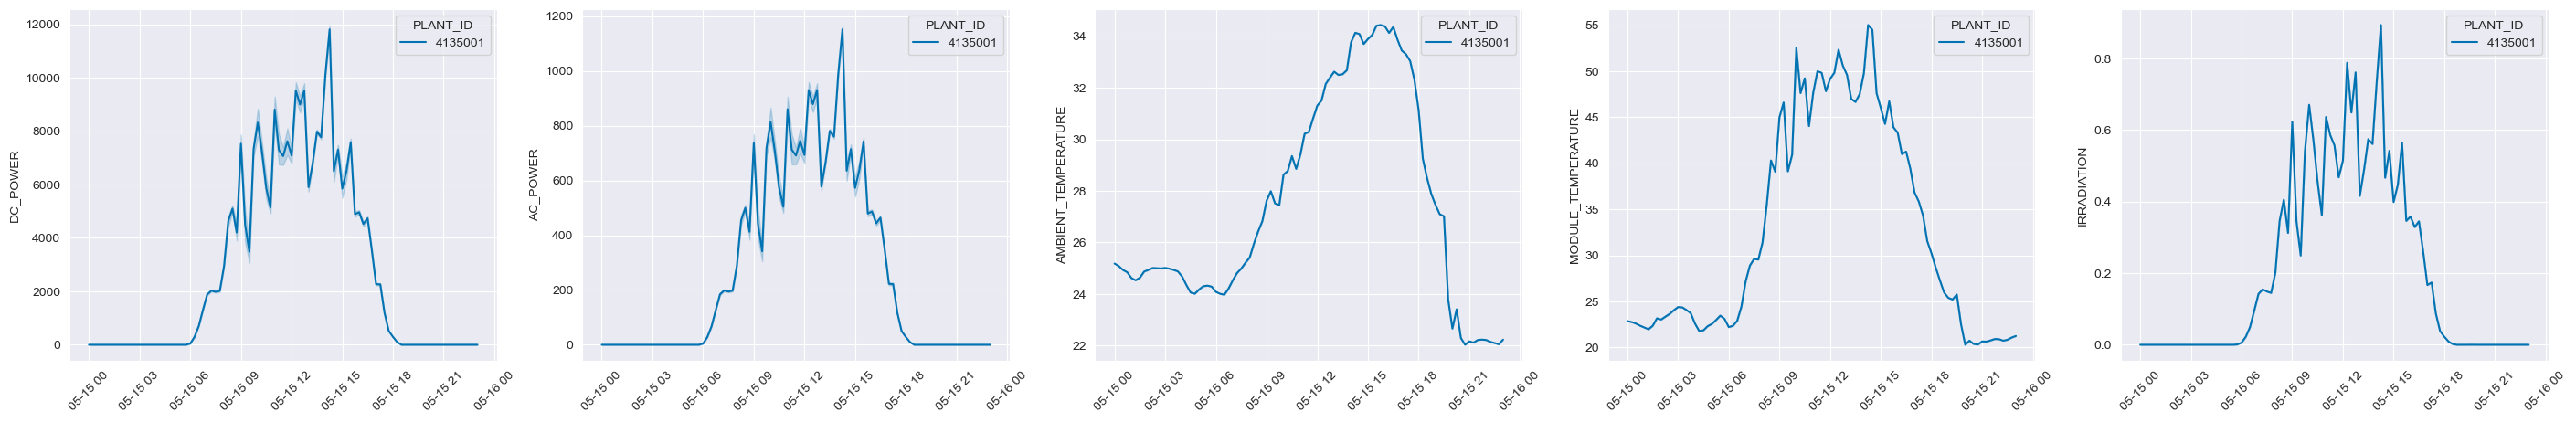

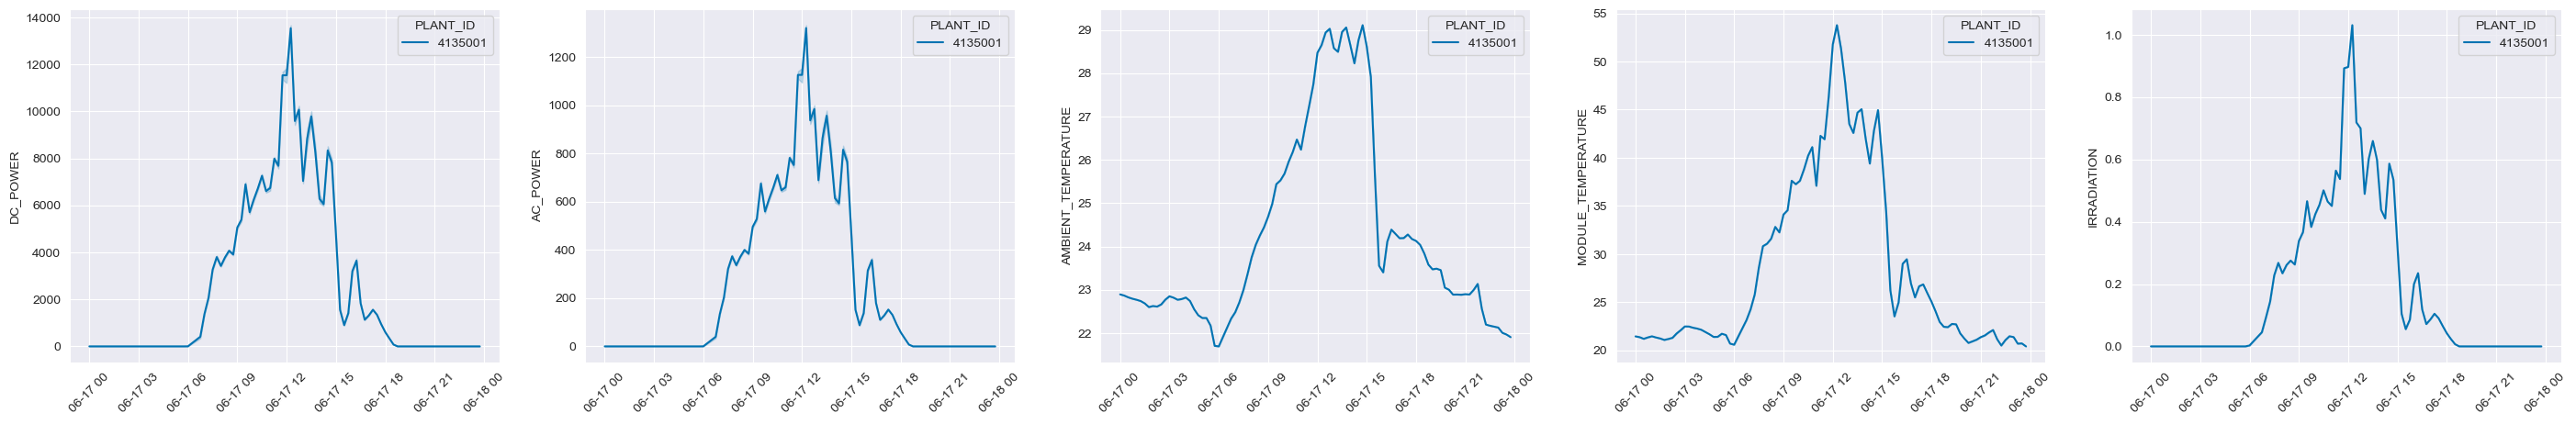

In [46]:
for date in ["2020-05-15", "2020-06-17"]:
    plot_date(df_plant1, date)

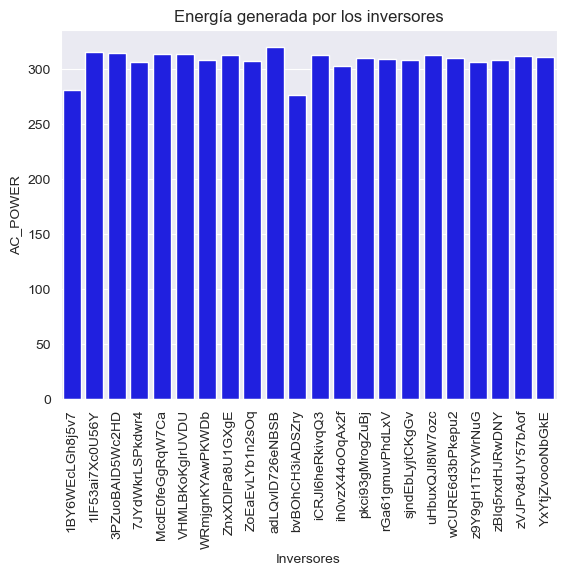

In [41]:
# Energia generada por los inversores
g = sns.barplot(data=df_plant1, x='SOURCE_KEY_GENERATION', y='AC_POWER', color='blue', ci=None)
plt.xticks(rotation=90)
g.set_title("Energía generada por los inversores")
g.set(xlabel='Inversores')

plt.show()

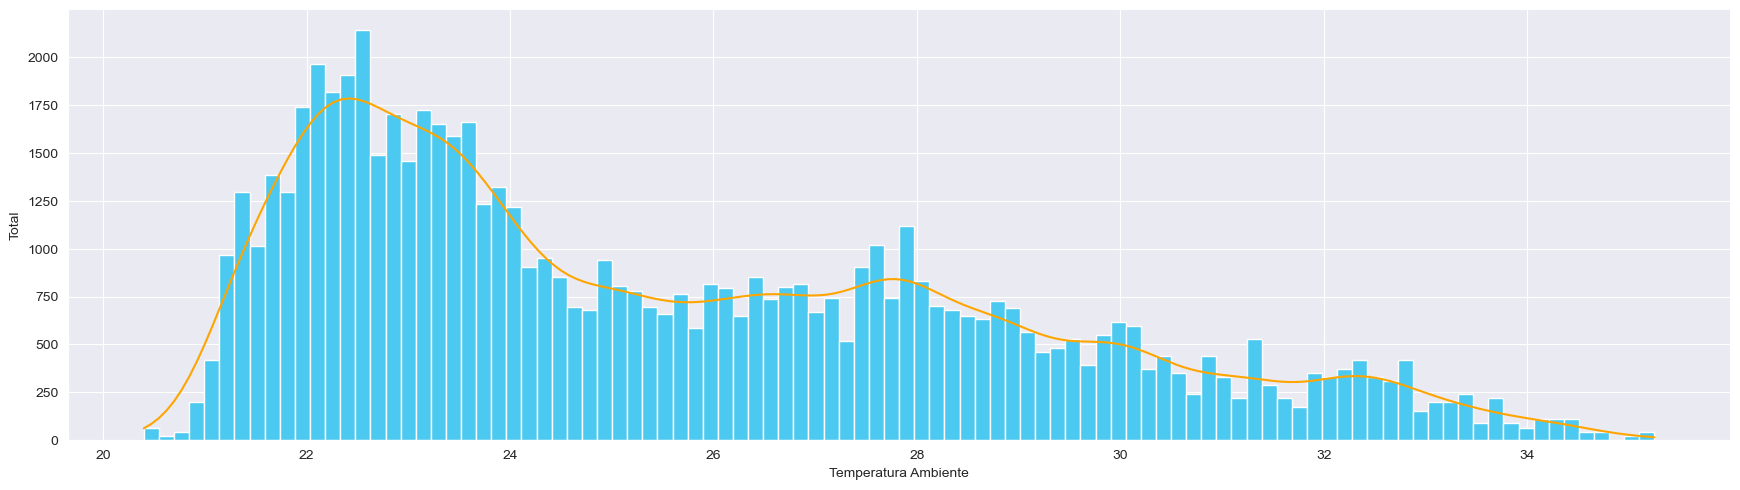

In [42]:
# Dist datos x Ambient  Temp
g = sns.displot(data=df_plant1, x="AMBIENT_TEMPERATURE", bins=100, kde=True, aspect=3.5, height=5, color='orange', facecolor="#4CC9F0")
g.set(
    xlabel="Temperatura Ambiente",
    ylabel="Total"
)
plt.title = "Distribución de la temperatura ambiental"
plt.show()

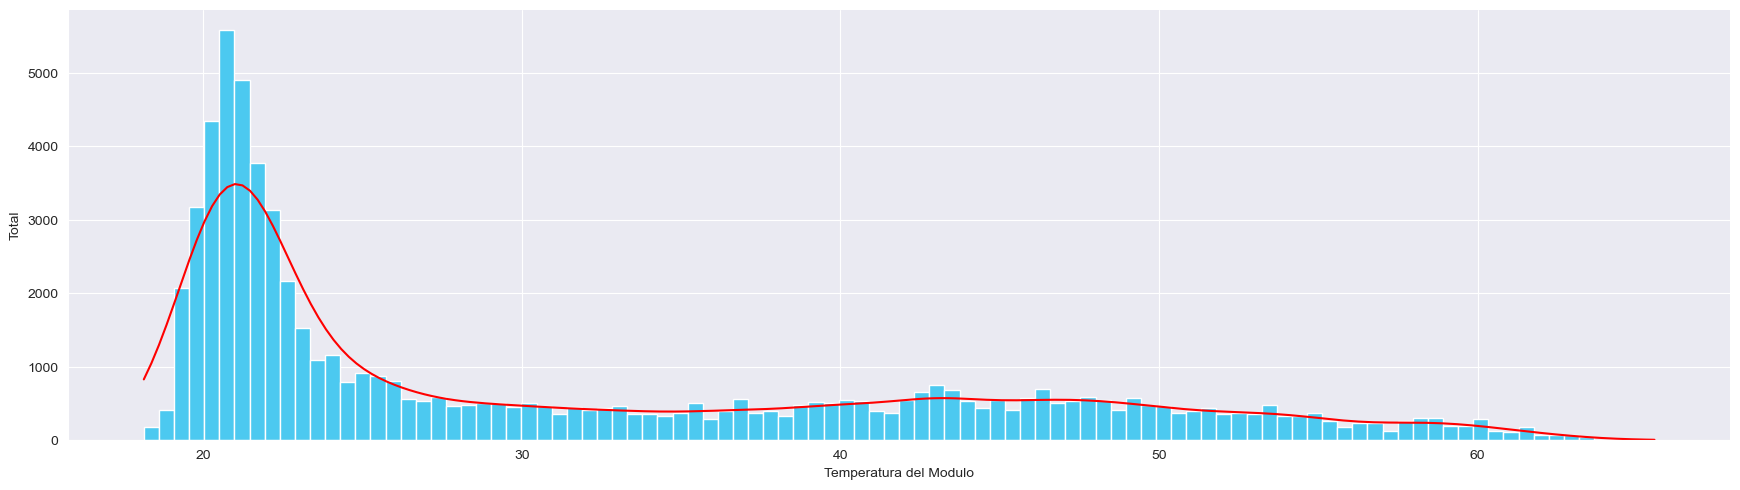

In [43]:
# Dist datos x Module  Temp
g = sns.displot(data=df_plant1, x="MODULE_TEMPERATURE", bins=100, kde=True, aspect=3.5, height=5, color='red', facecolor="#4CC9F0")
g.set(
    xlabel="Temperatura del Modulo",
    ylabel="Total"
)
g.set_titles("Distribución de la temperatura del modulo")
plt.title = "Distribución de la temperatura del modulo"
plt.show()

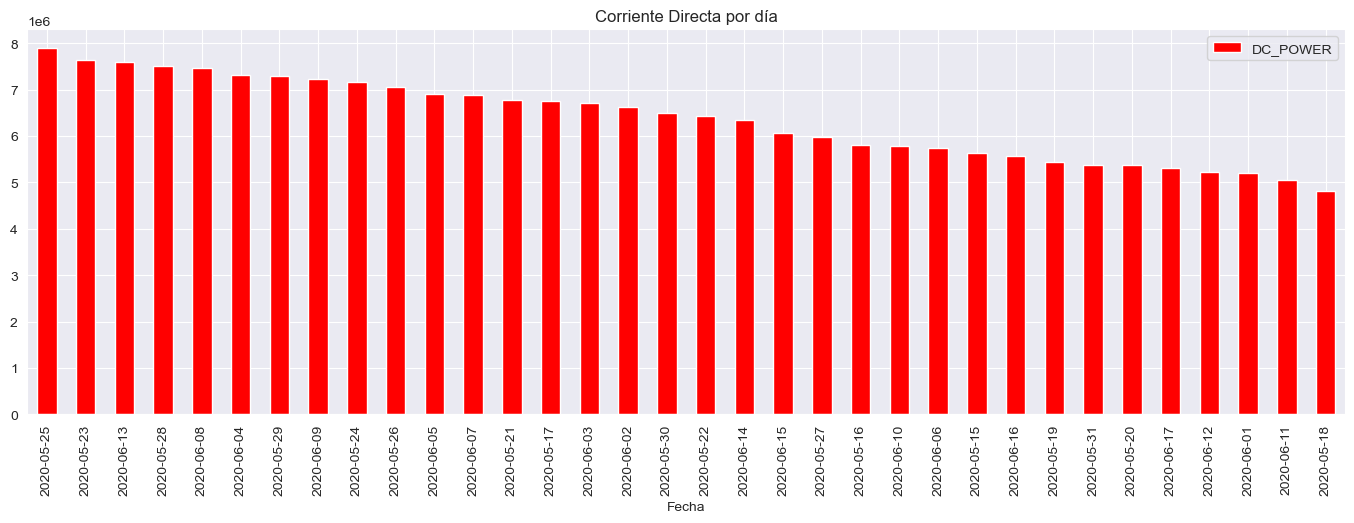

In [44]:
# Corriente Directa x día
daily_dc = df_plant1.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True, color='red')
ax.set_title("Corriente Directa por día")
ax.set(xlabel="Fecha")
plt.show()

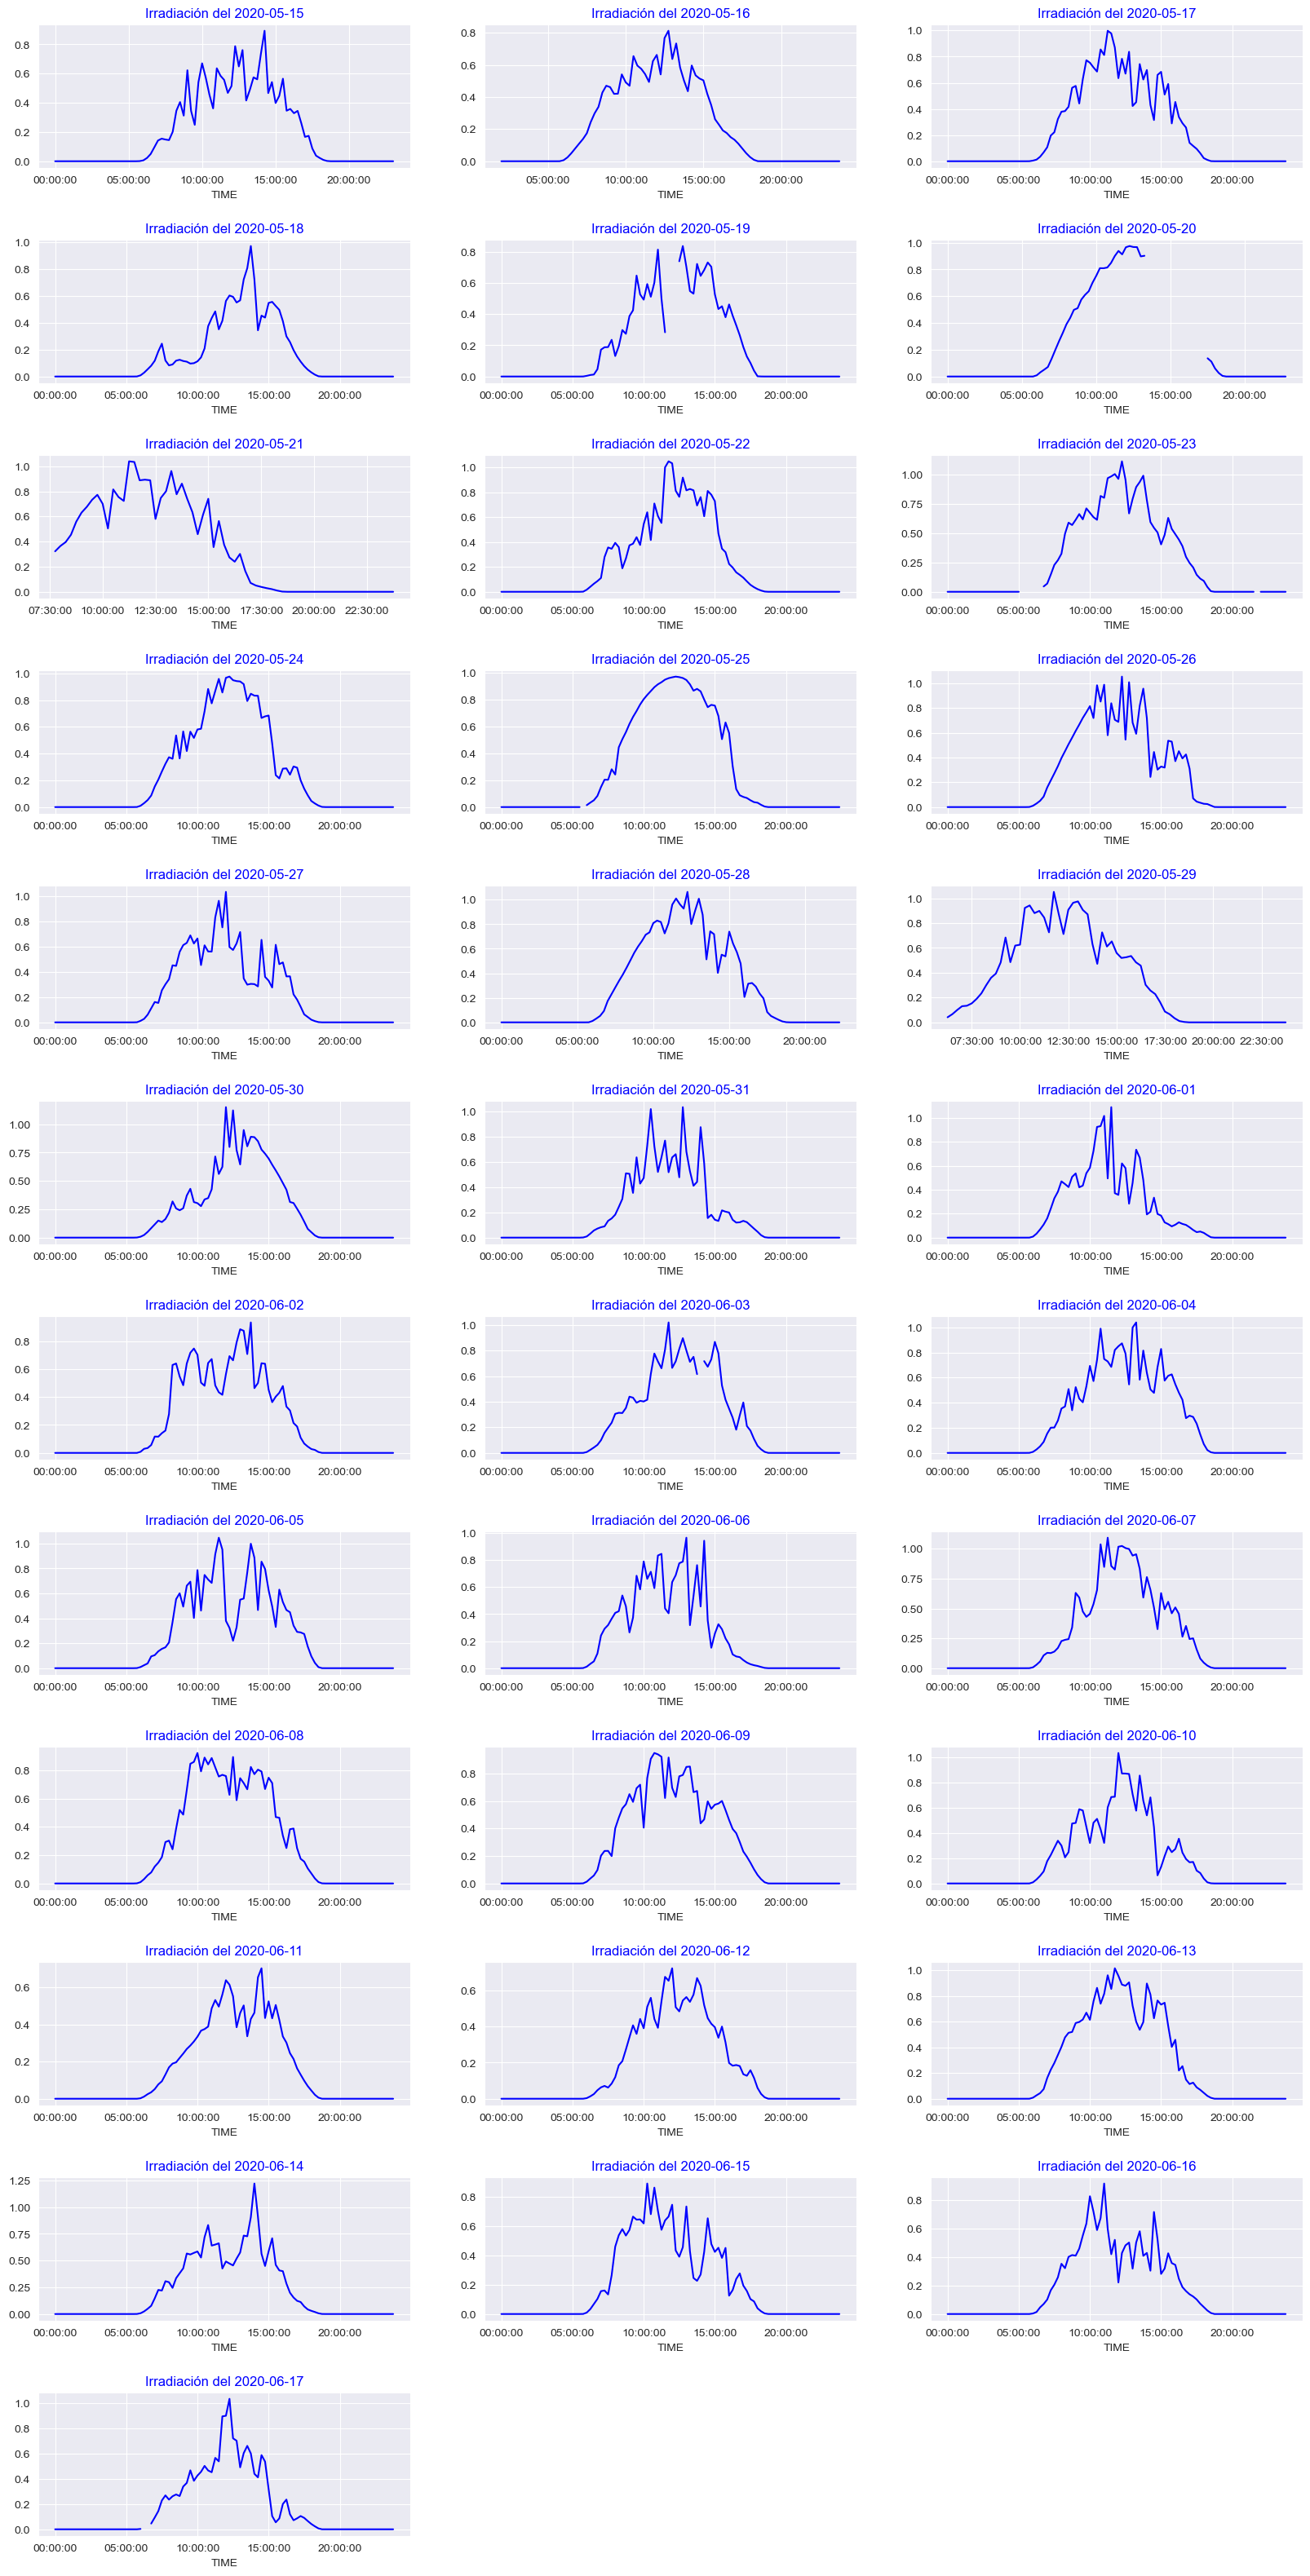

In [45]:
# Tabla Pivot
solar_irradiation = df_plant1.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

# Graficamos por día en base al tiempo y la irradiacion
def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3, title="Irradiación del")